In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier

# Import the data

In [2]:
sample_submission_df = pd.read_csv("data/sample_submission.csv")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [3]:
pd.set_option('display.max_columns', None)
train_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [5]:
train_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


No object columns but a lot of int64 and float64 columns. <br>
Need to transform int to float transform some of the columns. Last int columns are target columns.

In [6]:
y_columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
X_columns = [col for col in train_df.columns if col not in y_columns]
y = train_df[y_columns]
X = train_df[X_columns]

X = X.drop(["id"], axis=1)

# EDA

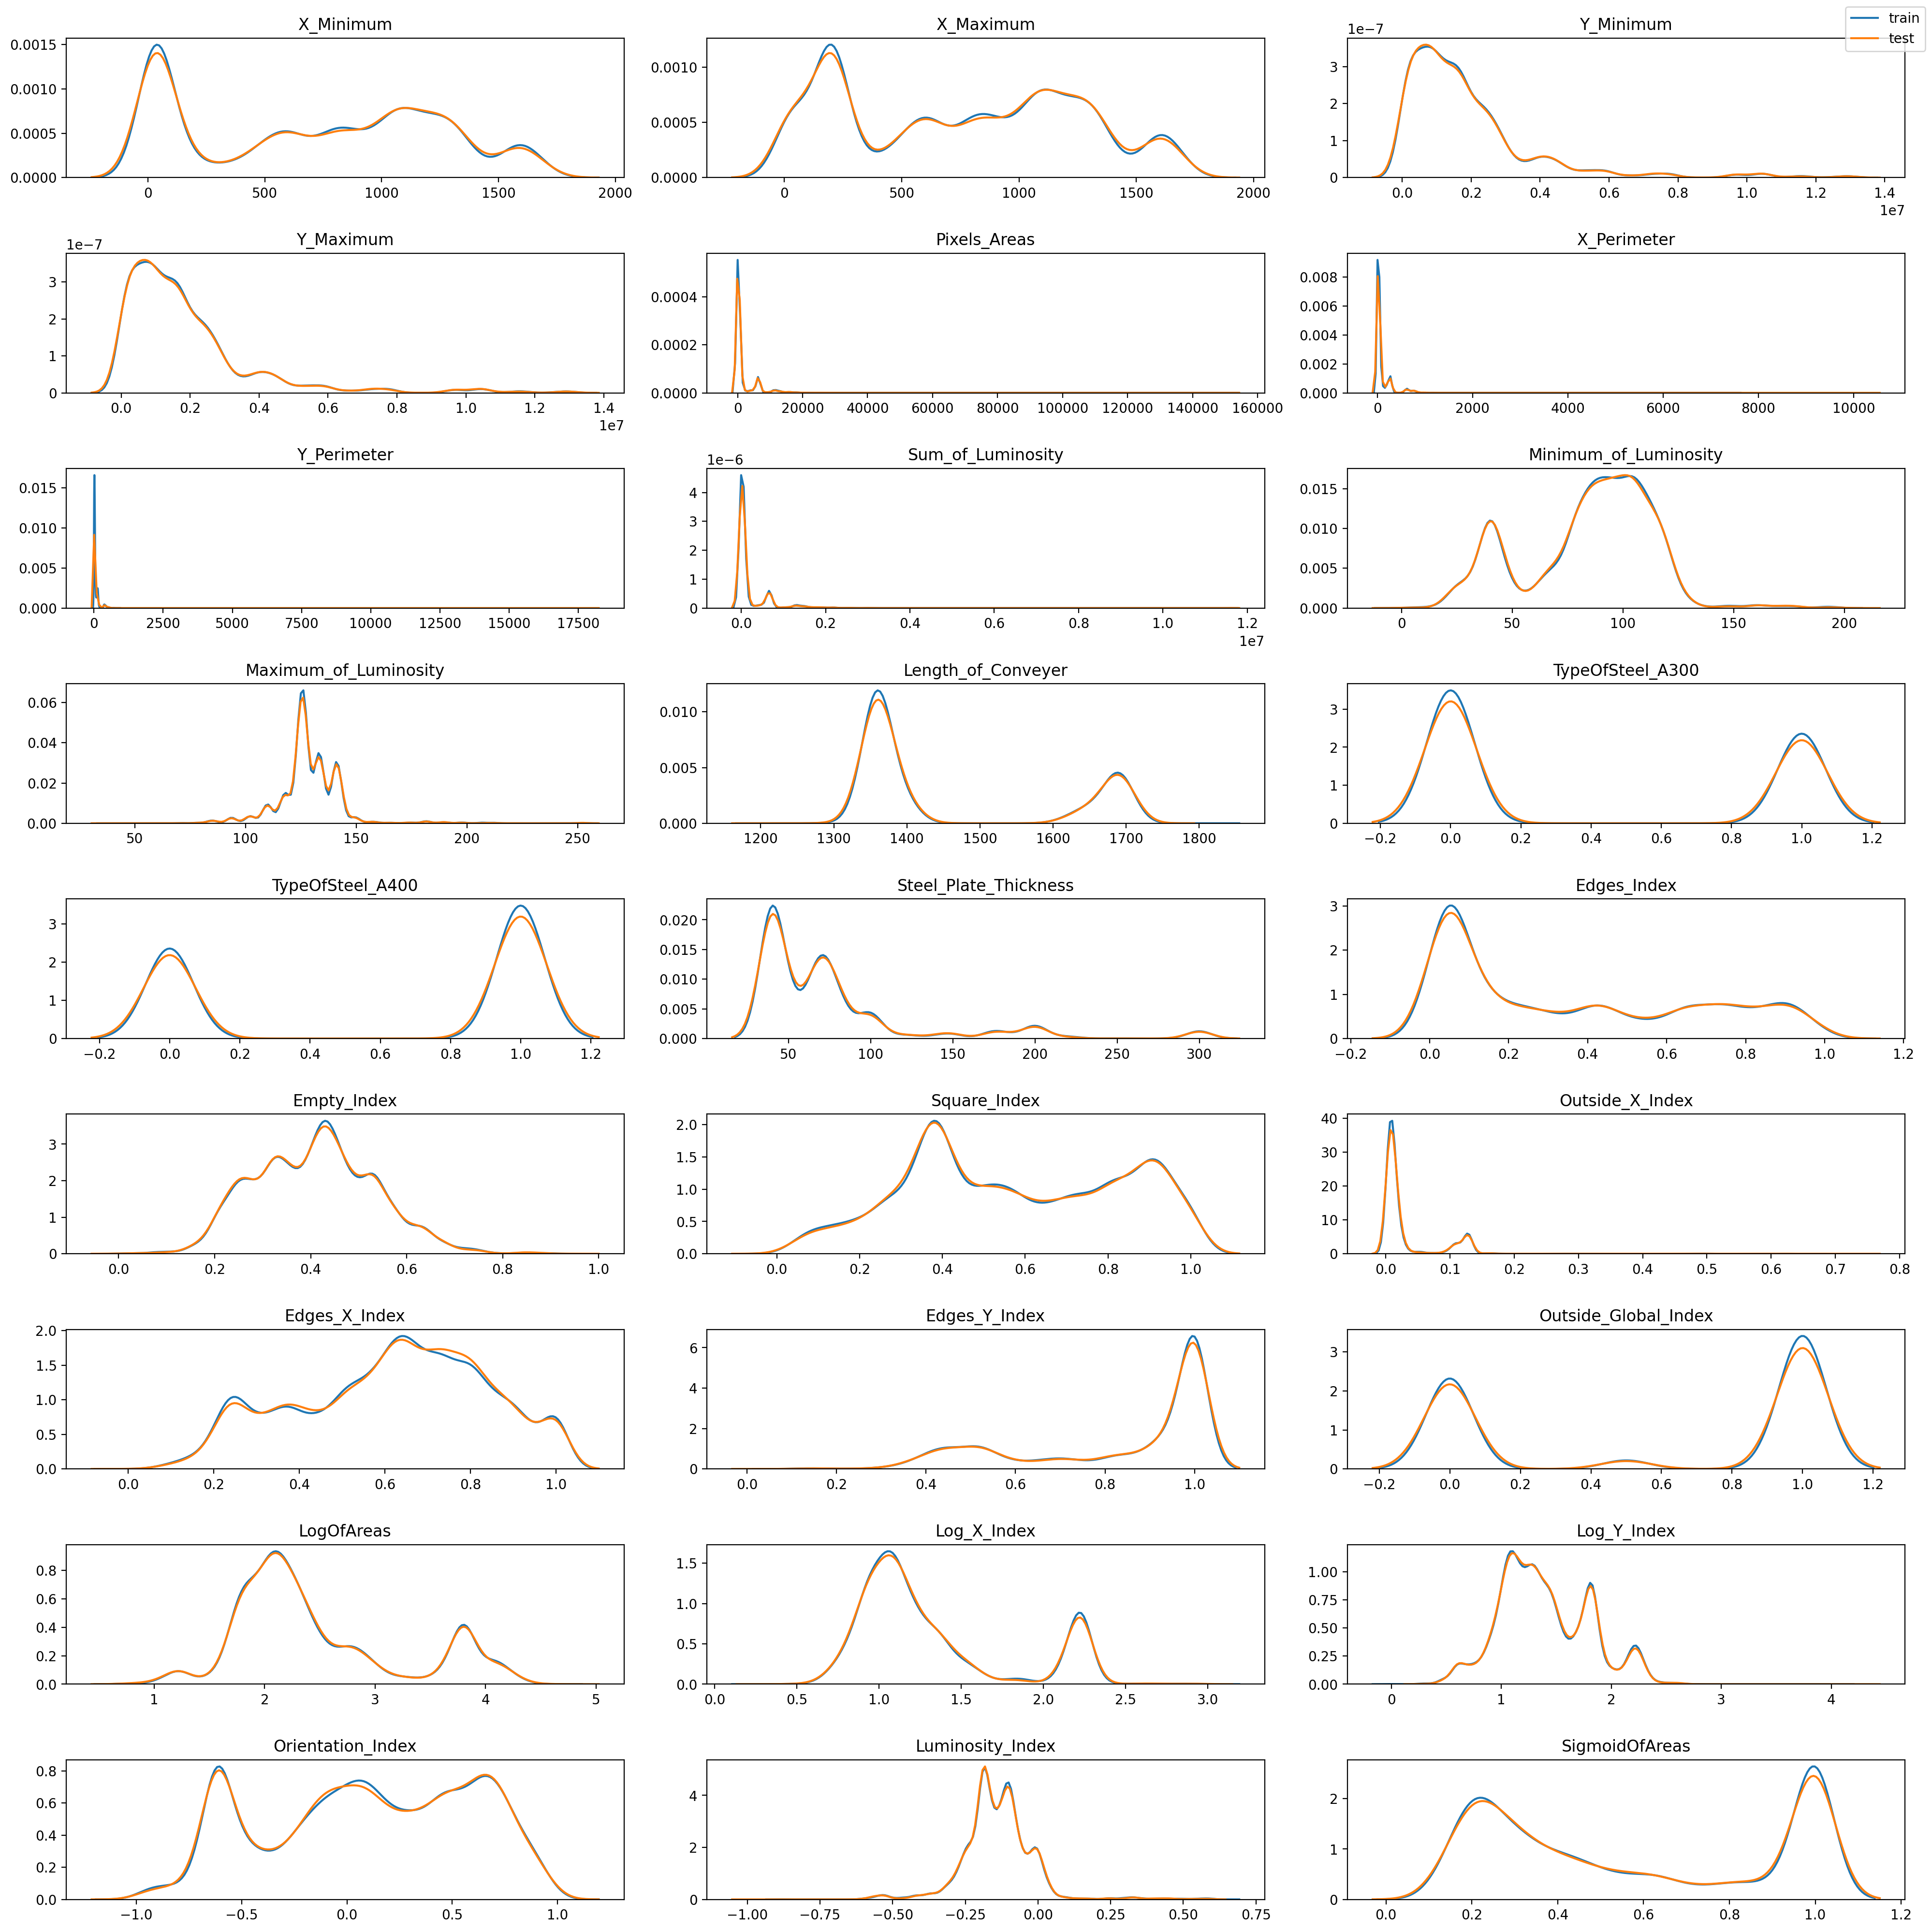

In [7]:
X.astype("float64")

fig, axes = plt.subplots(9, 3, figsize=(20, 20), dpi=200)
axes = axes.flatten()
pal = sns.color_palette()

for i, col in enumerate(X.columns):
    sns.kdeplot(data=train_df[col], ax=axes[i], color=pal[0])
    sns.kdeplot(data=test_df[col], ax=axes[i], color=pal[1])
    
    axes[i].set_title(col)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
fig.legend(['train', 'test'])    
plt.tight_layout()

Distribution of value between train and test datasets are similar.

# Correlation matrix

<Axes: >

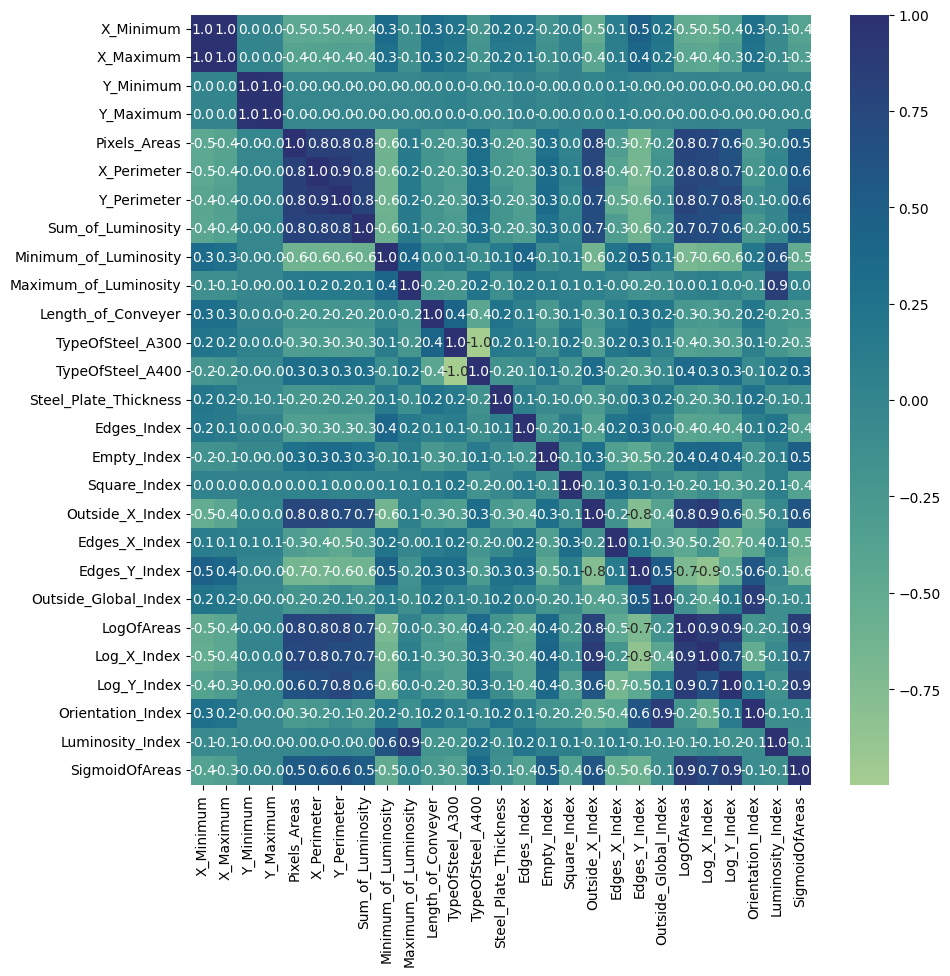

In [8]:
mat_corr = X.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat_corr, annot=True, fmt=".1f", cmap="crest")

We can see columns that are directly correlated : <br>
- X_Minimum and X_Maximum
- Y_Minimum and Y_Maximum
- TypeOfSteel_A300 and TypeOfSteel_A400 <br>


We can then remove 1 column from each couple.

In [9]:
X.drop(["X_Minimum", "Y_Minimum", "TypeOfSteel_A300"], axis=1, inplace=True)
test_df.drop(["X_Minimum", "Y_Minimum", "TypeOfSteel_A300"], axis=1, inplace=True)

# Model

In [10]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
lgbm_model = LGBMClassifier(objective = "binary")
model = MultiOutputClassifier(lgbm_model)
scores = []
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    model.fit(X_train, y_train, eval_metric="auc")
    scores.append(model.score(X_test, y_test))
print(scores)

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in pos

[LightGBM] [Info] Number of positive: 1165, number of negative: 14210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4685
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.075772 -> initscore=-2.501225
[LightGBM] [Info] Start training from score -2.501225
[LightGBM] [Info] Number of positive: 930, number of negative: 14445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4685
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.060488 -> initscore=-2.742919
[Ligh

# Submit predictions

In [11]:
id_df = test_df["id"]
predictions = model.predict_proba(test_df.drop(["id"], axis=1))

In [20]:
result = []
for i, predic in enumerate(predictions):
    pred = [pred[1] for pred in predic]
    result.append(pred)
print(pd.DataFrame(list(zip(*result))))

[array([[3.81390995e-01, 6.18609005e-01],
       [6.96792621e-01, 3.03207379e-01],
       [9.99333930e-01, 6.66070404e-04],
       ...,
       [9.99742080e-01, 2.57920161e-04],
       [6.87899219e-01, 3.12100781e-01],
       [9.99297737e-01, 7.02262775e-04]]), array([[9.99624714e-01, 3.75286338e-04],
       [9.95173702e-01, 4.82629809e-03],
       [9.50021803e-01, 4.99781967e-02],
       ...,
       [9.99814936e-01, 1.85063729e-04],
       [9.87140473e-01, 1.28595268e-02],
       [9.99656702e-01, 3.43297669e-04]]), array([[0.99828237, 0.00171763],
       [0.99227282, 0.00772718],
       [0.95311463, 0.04688537],
       ...,
       [0.08201778, 0.91798222],
       [0.99638425, 0.00361575],
       [0.03995324, 0.96004676]]), array([[9.99996771e-01, 3.22897497e-06],
       [9.99995269e-01, 4.73123497e-06],
       [9.99956649e-01, 4.33505146e-05],
       ...,
       [9.99995692e-01, 4.30786900e-06],
       [9.99997493e-01, 2.50651475e-06],
       [9.99996181e-01, 3.81878924e-06]]), array([